# 4. Linear Regression

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

## 4.1 Generate Data

In [10]:
x_data = torch.Tensor([1, 2, 3, 4, 5]) #각각이 하나의 데이터
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = x_data.view(5, 1)
y = y_data.view(5, 1)

print("x :", x)
print("y :", y)

x : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y : tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


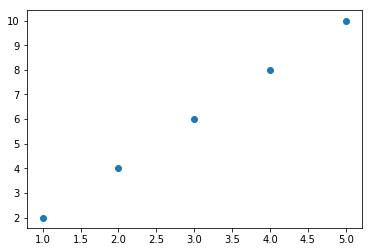

In [12]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

## 4.2 Derive Normal Equation (참고)

In [13]:
xtx = torch.mm(x.t(),x)
xtx_inv = xtx.inverse()
xtx_inv_xt = torch.mm(xtx_inv, x.t())

In [14]:
w = torch.mm(xtx_inv_xt, y)
w.item()  #back propagabtion 통해서 2를 구하는게 목표

1.9999998807907104

## 4.3 Define Model with Grad, nn.loss

In [7]:
w = torch.rand(1,1)
w.item()

0.09425246715545654

In [8]:
w*x

tensor([[0.0943],
        [0.1885],
        [0.2828],
        [0.3770],
        [0.4713]])

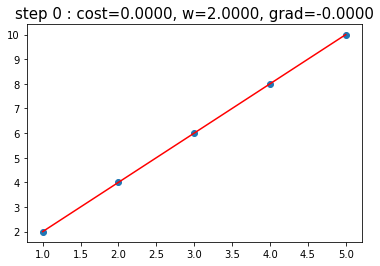

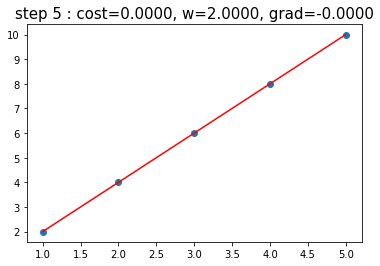

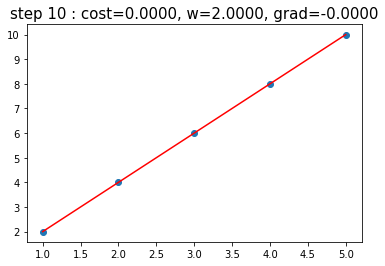

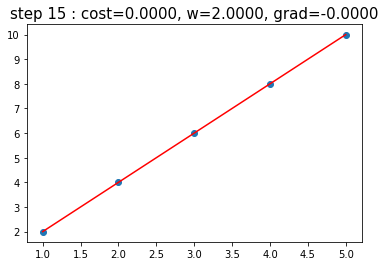

In [15]:
lr = 0.01

for step in range(20):
    pre = w*x
    cost = ((pre - y) ** 2).sum() / len(x)
    #(wx-y)^2 미분 시 2(wx-y)*x
    grad = 2*(pre-y).view(5).dot(x.view(5))/len(x)
    w -= lr*grad
    
    if step % 5 == 0 :
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), pre.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % (step, cost.item(), w.item(), grad.item()), fontdict={'size':15})
        plt.show()


In [16]:
x_new = torch.Tensor([6])
y_new = w*x_new
y_new.item()

11.999999046325684

## 4.4 Define Model with nn.Linear, Optimizer

#### PyTorch의 모든 모델은 제공되는 nn.Module을 inherit해서 만듦. 
#### 여기서는 LR모델을 만들기 때문에 nn.Linear 사용한다. nn.Linear(input dim, output dim) 형태

In [22]:
model = nn.Linear(1, 1, bias = False)
print(list(model.parameters())) #bias=0이므로 weight만 출력

[Parameter containing:
tensor([[-0.2232]], requires_grad=True)]


In [23]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

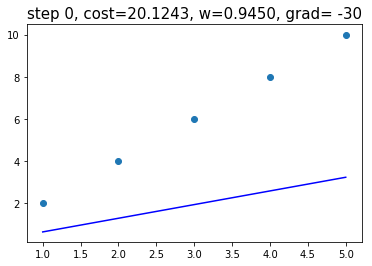

Epoch    0/30 W: 0.945,  Cost: 20.124258


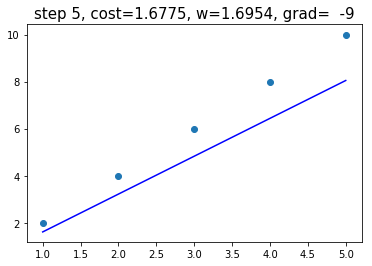

Epoch    5/30 W: 1.695,  Cost: 1.677513


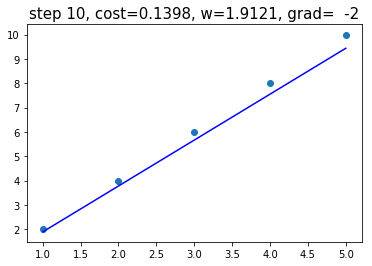

Epoch   10/30 W: 1.912,  Cost: 0.139834


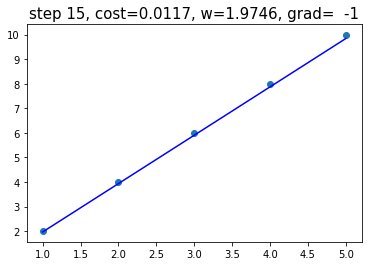

Epoch   15/30 W: 1.975,  Cost: 0.011656


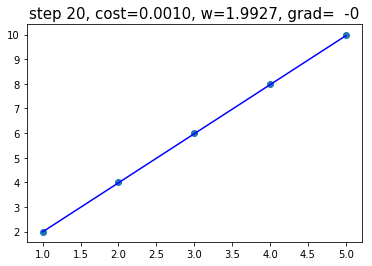

Epoch   20/30 W: 1.993,  Cost: 0.000972


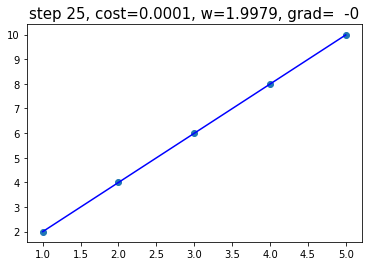

Epoch   25/30 W: 1.998,  Cost: 0.000081


In [26]:
#중요
for step in range(30):
    pre = model(x) #예측값 계산
    cost = loss(pre, y) #mse값 계산
    
    optimizer.zero_grad() #초기화 (모든 그래드=0)
    cost.backward() #계산
    optimizer.step() #업데이트
    
    if step % 5 == 0:
        plt.scatter(x.numpy(), y.numpy())
        # grad를 가진 tensor는 numpy()를 바로 사용할 수 없음
        # RuntimeError: Can't call numpy() on Variable that requires grad.
        plt.plot(x.numpy(), pre.data.numpy(), 'b-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' 
                  % (step, cost.item() ,model.weight.item(), model.weight.grad.item()), fontdict={'size':15})
        plt.show()
        
        params = list(model.parameters())
        W = params[0].item()
        #b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f},  Cost: {:.6f}'.format(
            step, 30, W, cost.item()
        ))

#### step 커질수록 cost가 점점 줄어드는 것을 볼 수 있다.

In [14]:
x_new = torch.Tensor([6])
y_new = model(x_new)
y_new.item()

11.99374771118164